# Dimensonality Reduction - Incremental PCA

The PCA algorithm requires the whole training set to fit in memory in order for the Singular Value Decomposition (SVD) algorithm to run. 

However, it doesn't work in two scenarios.
- If dataset is too large.
- If PCA needs to be applied in active learning.

As a solution to the above issue we can apply the Incremental PCA (IPCA) algorithm that applies PCA incrementally. 

This algorithm splits the training set into mini-batches and feed the IPCA algorithm on one mini-batch at a time. 

## Dataset: MNIST


We use the MNIST (Modified National Institute of Standards and Technology) dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.


There are 70,000 images. Each image is **grayscale 28 x 28 pixels**, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

Thus, each image has **784 features**. 


In [1]:
import warnings
import time
import numpy as np
import pandas as pd
from scipy.io import loadmat
import copy 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


from sklearn.decomposition import IncrementalPCA

from sklearn.datasets import fetch_openml


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


## Load Data, Create Data Matrix (X) & Target Vector (y)

Load the data from a local folder or load it directly from cloud using Scikit-Learn.


In [2]:
# Load the data from the local folder "data"
mnist = loadmat('/Users/hasan/datasets/MNIST/mnist-original.mat')

# Create the data Matrix X and the target vector y
X = mnist["data"].T.astype('float64')
y = mnist["label"][0].astype('int64')


# Load data using Scikit-Learn
#mnist = fetch_openml('mnist_784', cache=False)


# X = mnist["data"].astype('float64')
# y = mnist["target"].astype('int64')


print("\nNo. of Samples: ", X.shape)
print("No. of Labels: ", y.shape)

print("X Type: ", X.dtype)
print("y Type: ", y.dtype)



No. of Samples:  (70000, 784)
No. of Labels:  (70000,)
X Type:  float64
y Type:  int64


## Split the Data as Train and Test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Incremental PCA

The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class to reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like before). 

We need to call the partial_fit() method with each mini-batch rather than the fit() method with the whole training set.

In [4]:
%%time

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") 
    inc_pca.partial_fit(X_batch)


print("\n")

X_reduced = inc_pca.transform(X_train)

....................................................................................................

CPU times: user 50.5 s, sys: 1.47 s, total: 51.9 s
Wall time: 13.1 s


In [5]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [6]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

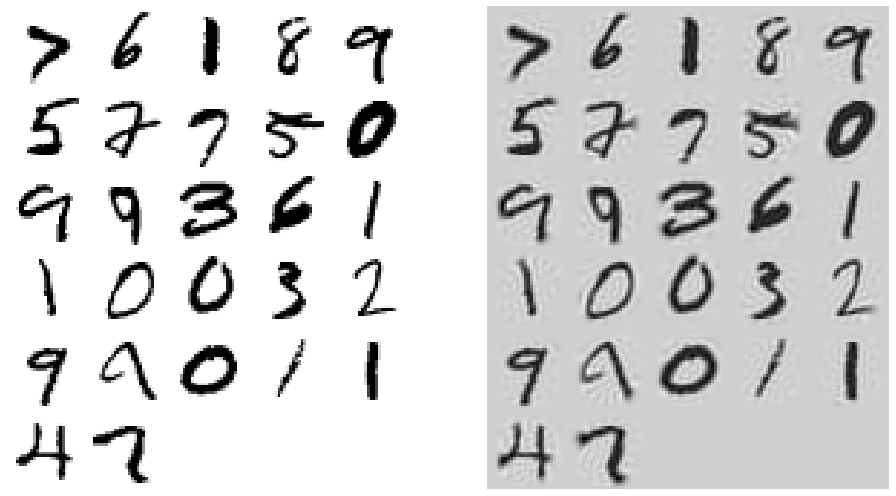

In [7]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()